# Traffic Sign Identification

Dataset - https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed

In [3]:
#Import packages
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [5]:
%ls MyDrive/modules

__pycache__/  traffic_utils_online.py


In [6]:
import sys
sys.path.append("MyDrive/modules")
from traffic_utils_online import *
%load_ext autoreload
%autoreload 2


In [7]:
#Load Data
x_train_org, y_train_org, \
x_test_org, y_test_org,   \
x_val_org, y_val_org, labels     = get_traffic_data()
nlabels = len(labels)

In [8]:
x_train_org.shape

(86989, 32, 32, 3)

y = 37
y = 27
y = 38
y = 28
y = 42
y = 4
y = 7
y = 29
y = 17
y = 23
y = 33
y = 39


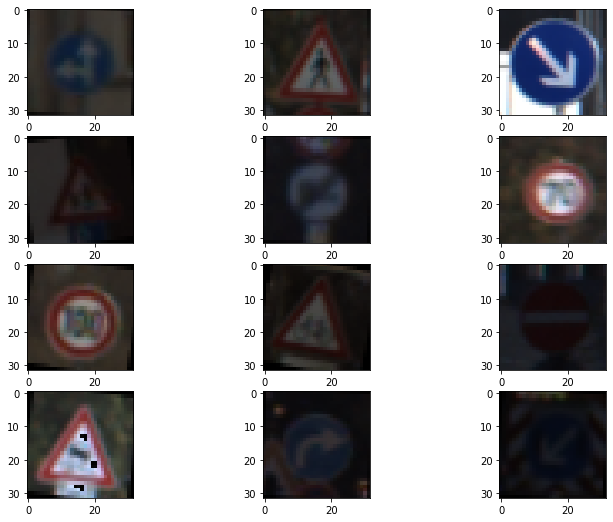

In [9]:
# Example of an image from the dataset
f,axarr = plt.subplots(4,3,figsize=(12,9))

for idx in range (0,12):
    index = idx
    idx1 = int(np.floor(idx/3))
    idx2 = (idx%3)
    axarr[idx1][idx2].imshow(x_train_org[index])
    print ("y = " + str(y_train_org[index]))

Train Mean  66.64182719567393  Test Mean  82.148544


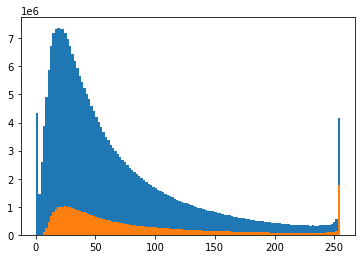

In [44]:
plt.hist(x_train_org.flatten(),bins=128)
plt.hist(x_test_org.flatten(),bins=128)
print ("Train Mean ",np.mean(x_train_org)," Test Mean ", np.mean(x_test_org))

In [8]:
y_train_org.reshape(-1).shape

(86989,)

In [9]:
yy= convert_to_one_hot(y_train_org[:5],nlabels)
yy.shape

[37 27 38 28 42]
43


(5, 43)

### Create  Train/Test sets

In [38]:
x_train = x_train_org/255.
x_test  = x_test_org/255.
y_train = convert_to_one_hot(y_train_org,nlabels)
y_test  = convert_to_one_hot(y_test_org,nlabels)
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

[37 27 38 ... 11 14 30]
43
[25 11 38 ...  8 33 10]
43
number of training examples = 86989
number of test examples = 12630
X_train shape: (86989, 32, 32, 3)
Y_train shape: (86989, 43)
X_test shape: (12630, 32, 32, 3)
Y_test shape: (12630, 43)


In [39]:
def convolutional_model(input_shape,stride,fsize):
    #
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=16,kernel_size=(fsize,fsize),
                   strides=stride,padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(4,4),
                       strides=4,padding='same')(A1)

    Z2 = tfl.Conv2D(16,(4,4),1,padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=4,padding='same')(A2)

    F = tfl.Flatten()(P1)    
    #
    outputs = tfl.Dense(units=43,activation='softmax')(F)
    model   = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model

In [40]:
conv_model = convolutional_model((32,32,3),stride=1,fsize=8)
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
#nparameters = f*f*3*nfilters+nfilters

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        3088      
                                                                 
 re_lu (ReLU)                (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 43)                44075     
                                                             

# Train the Model

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((
                x_train[:76000,:,:,:], y_train[:76000,:])).batch(64)
test_dataset  = tf.data.Dataset.from_tensor_slices((
                x_train[76000:,:,:,:], y_train[76000:,:])).batch(64)
history_train = conv_model.fit(train_dataset,epochs=5,
                         validation_data=test_dataset)

Epoch 1/5
1188/1188 [==============================] - 101s 85ms/step - loss: 0.9520 - accuracy: 0.7923 - val_loss: 0.5366 - val_accuracy: 0.8877
Epoch 2/5
1188/1188 [==============================] - 100s 84ms/step - loss: 0.3937 - accuracy: 0.9229 - val_loss: 0.3229 - val_accuracy: 0.9376
Epoch 3/5
1188/1188 [==============================] - 101s 85ms/step - loss: 0.2545 - accuracy: 0.9512 - val_loss: 0.2456 - val_accuracy: 0.9537
Epoch 4/5
1188/1188 [==============================] - 108s 91ms/step - loss: 0.1874 - accuracy: 0.9638 - val_loss: 0.1915 - val_accuracy: 0.9642
Epoch 5/5
1188/1188 [==============================] - 102s 86ms/step - loss: 0.1467 - accuracy: 0.9718 - val_loss: 0.1704 - val_accuracy: 0.9689


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

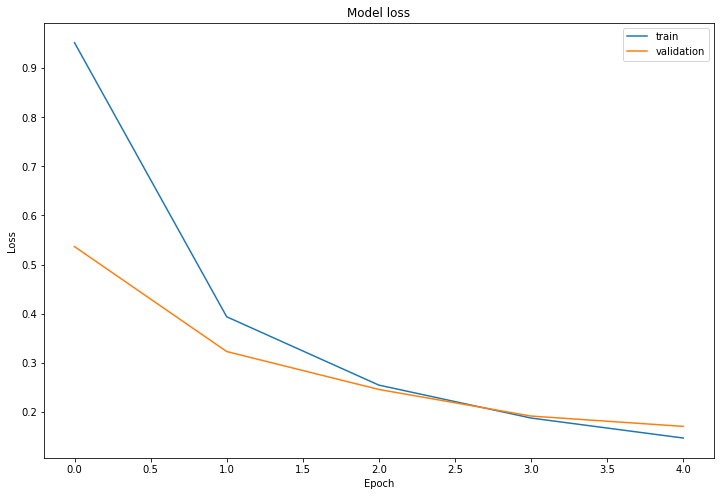

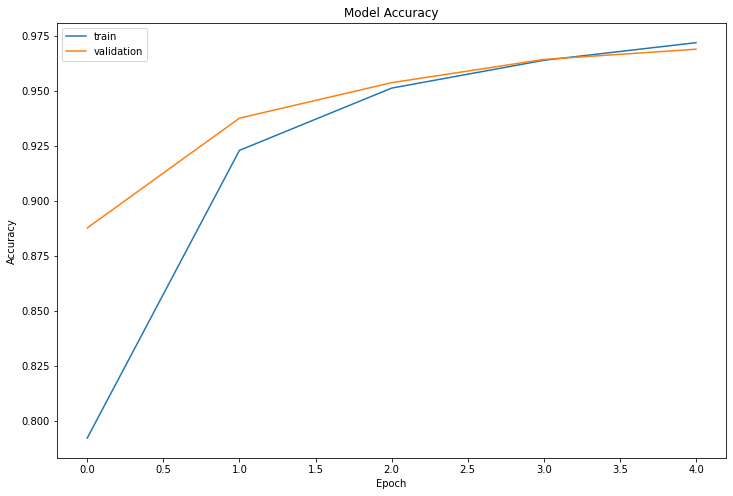

In [18]:
df_loss_acc = pd.DataFrame(history_train.history)

df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [41]:
train_dataset = tf.data.Dataset.from_tensor_slices((
                x_train, y_train)).batch(64)
test_dataset  = tf.data.Dataset.from_tensor_slices((
                x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset,epochs=5,
                         validation_data=test_dataset)

Epoch 1/5
1360/1360 [==============================] - 127s 92ms/step - loss: 1.2516 - accuracy: 0.7101 - val_loss: 0.9182 - val_accuracy: 0.7928
Epoch 2/5
1360/1360 [==============================] - 115s 85ms/step - loss: 0.3900 - accuracy: 0.9241 - val_loss: 0.8135 - val_accuracy: 0.8400
Epoch 3/5
1360/1360 [==============================] - 114s 84ms/step - loss: 0.2426 - accuracy: 0.9538 - val_loss: 0.8091 - val_accuracy: 0.8532
Epoch 4/5
1360/1360 [==============================] - 114s 84ms/step - loss: 0.1740 - accuracy: 0.9667 - val_loss: 0.8515 - val_accuracy: 0.8540
Epoch 5/5
1360/1360 [==============================] - 114s 84ms/step - loss: 0.1367 - accuracy: 0.9743 - val_loss: 0.7737 - val_accuracy: 0.8744


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

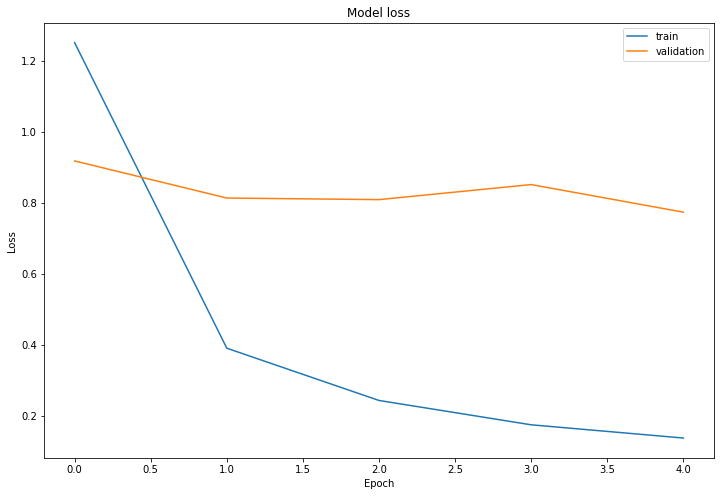

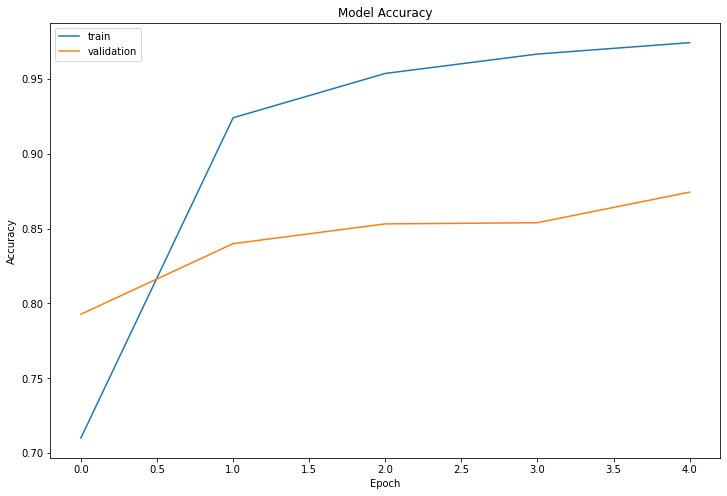

In [42]:
df_loss_acc = pd.DataFrame(history.history)

df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')